In [13]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm   # OSM module
import statistics as sts       # Basic statistics

In [14]:
# Read the data set using pandas
file=pd.read_csv('Segmentdata.csv')
# Parsing 'InvoiceDate' as date data type
file['InvoiceDate'] = pd.to_datetime(file['InvoiceDate']) .apply(lambda x: x.strftime('%d/%m/%Y')if not pd.isnull(x) else '')
# Parsing 'InvoiceTime' as time data type
file['Invoice Time'] = pd.to_datetime(file['Invoice Time']).apply(lambda x: x.strftime('%H:%M:%S')if not pd.isnull(x) else '')
file.dropna(inplace=True)      # Drop null values
file.reset_index(inplace=True) # Introduce index col
file.head()                    # Check the data

,index,InvoiceDate,Invoice Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice,Revenue,Items availability,revenue_buckets,price_buckets,final_revenue
0,0,14/12/2017,06:00:00,AVpgMuGwLJeJML43KY_c,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,6,2.55,15.30,In Stock,Very Good,Medium,20
1,1,09/08/2017,05:00:00,AVpgMuGwLJeJML43KY_c,536365,71053,WHITE METAL LANTERN,United Kingdom,6,3.39,20.34,In Stock,Excellent,High,30
2,2,10/10/2017,05:00:00,AVpgMuGwLJeJML43KY_c,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,8,2.75,22.00,In Stock,Excellent,High,30
3,3,28/08/2017,07:00:00,AVpgMuGwLJeJML43KY_c,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39,20.34,In Stock,Excellent,High,30
4,4,24/10/2017,04:00:00,AVpgMuGwLJeJML43KY_c,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39,20.34,In Stock,Excellent,High,30


In [15]:
# int and float variables range
file.describe()

,index,InvoiceNo,Quantity,UnitPrice,Revenue,final_revenue
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,9999.000000,545115.134307,10.801240,2.985579,20.080151,25.577279
std,5773.358353,5492.606894,46.768777,4.137969,88.068819,87.944806
min,0.000000,536365.000000,1.000000,0.100000,0.120000,10.000000
25%,4999.500000,540520.000000,1.000000,1.250000,3.300000,10.000000
50%,9999.000000,544836.000000,4.000000,1.950000,8.950000,10.000000
75%,14998.500000,549947.000000,10.000000,3.750000,17.400000,20.000000
max,19998.000000,554656.000000,3906.000000,195.000000,3828.000000,3830.000000


In [16]:
# Data frame variables data types
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               19999 non-null  int64  
 1   InvoiceDate         19999 non-null  object 
 2   Invoice Time        19999 non-null  object 
 3   CustomerID          19999 non-null  object 
 4   InvoiceNo           19999 non-null  int64  
 5   StockCode           19999 non-null  object 
 6   Description         19999 non-null  object 
 7   Country             19999 non-null  object 
 8   Quantity            19999 non-null  int64  
 9   UnitPrice           19999 non-null  float64
 10  Revenue             19999 non-null  float64
 11  Items availability  19999 non-null  object 
 12  revenue_buckets     19999 non-null  object 
 13  price_buckets       19999 non-null  object 
 14  final_revenue       19999 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 2.3+

<IPython.core.display.Javascript object>


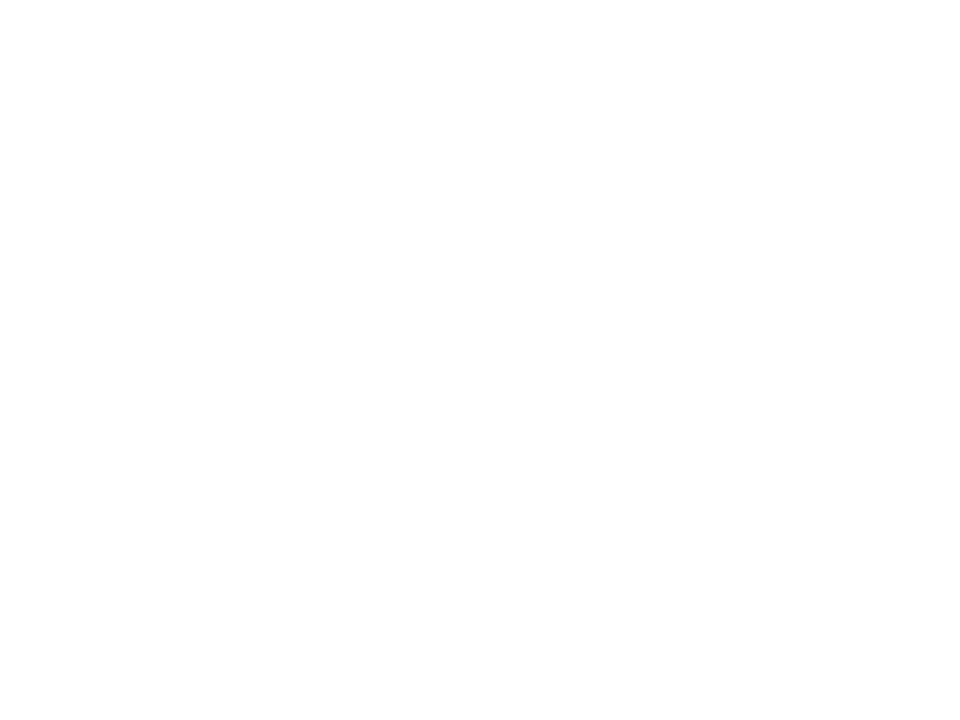

In [17]:
# Plotting distribution of 'final_revenue','UnitPrice' and 'Quantity'
%matplotlib notebook
h=['final_revenue','UnitPrice','Quantity','price_buckets','revenue_buckets','Country']
cond=file[h]
sns.set()
sns.boxplot(data=cond,orient='h')
plt.xlabel('Range')
plt.ylabel('Attributes')
plt.title('Quantitative attributes range')
plt.show()

In [18]:
# Assigning numerical values for 'Country' column
Labels = {'United Kingdom': 1,'Greece': 2,'Malta':3,'Canada':4,'United Arab Emirates':5} 

file.Country = [Labels[item] for item in file.Country] 

# Assigning numerical values to 'price_buckets'
M1= {'Critical':1,'Low':2,'Medium':3,'High':4,'Very High':5}
file.price_buckets = [M1[item] for item in file.price_buckets] 

# Assigning numerical values to 'revenue_buckets'
M2= {'Very Low':1,'Low':2,'Good':3,'Very Good':4,'Excellent':5}
file.revenue_buckets = [M2[item] for item in file.revenue_buckets]

In [19]:
# Data frame in quartiles
q1=file.quantile(0.25)
q3=file.quantile(0.75)
iqr=q3-q1 
iqr # Inter-quartile range

index              9999.0
InvoiceNo          9427.0
Country               0.0
Quantity              9.0
UnitPrice             2.5
Revenue              14.1
revenue_buckets       2.0
price_buckets         2.0
final_revenue        10.0
dtype: float64

In [20]:
file_t=file.drop('InvoiceDate',axis=1)   # Drop date data type
file_t=file.drop('index',axis=1)         # Drop index column
file_t=file.drop('Invoice Time',axis=1)  # Drop time data type

file_out = file_t[~((file_t< (q1 - 1.5 * iqr)) |(file_t> (q3 + 1.5 * iqr))).any(axis=1)] # outlier removal

print ("When we have not removed any outliers from the dataset, we have " + str(len(file_t)) + " entries") 
print ("When we have removed outliers from the dataset, we have " + str(len(file_out)) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(len(file_out)/len(file_t)))

When we have not removed any outliers from the dataset, we have 19999 entries
When we have removed outliers from the dataset, we have 13967 entries
The proportion of outliers which exist when compared to the dataframe are: 0.6983849192459622


In [21]:
# 33% of original data was removed when outliers are considered

In [22]:
rollingdf = file[h].rolling(30).std()  # 30-day rolling standard deviation
rollingdf.dropna(inplace=True)         # Drop null values

<IPython.core.display.Javascript object>


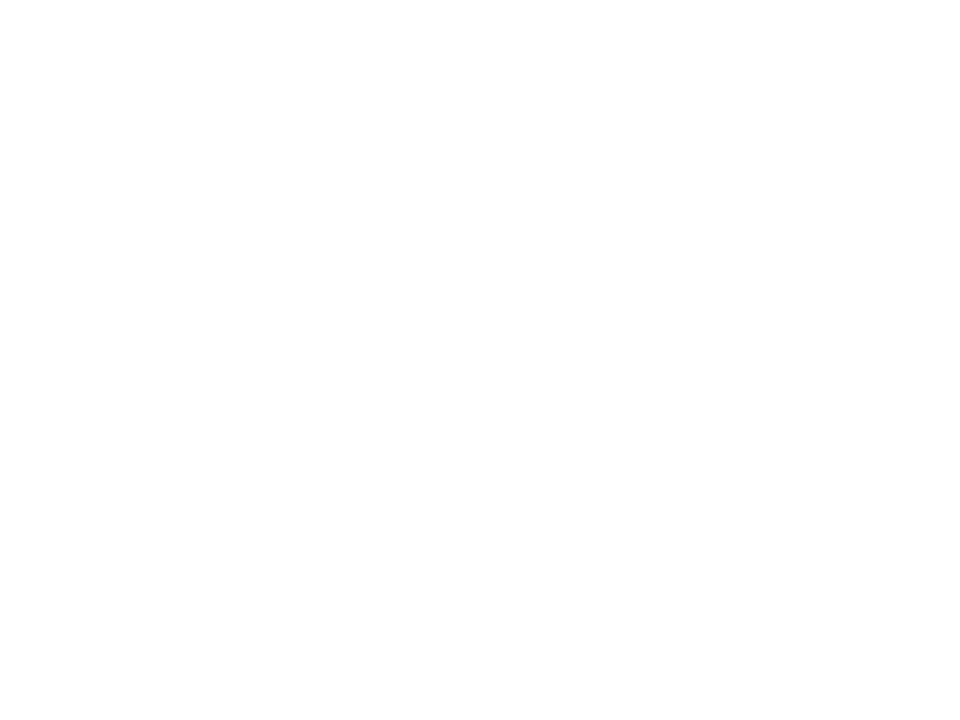

In [23]:
%matplotlib notebook
#h=['final_revenue','UnitPrice','Quantity']
cor=rollingdf[h].corr()   # correlation for selected columns
sns.set()
sns.heatmap(cor,cmap='RdYlGn',annot=True)

In [24]:
%matplotlib notebook

h1=['UnitPrice','Quantity','price_buckets','revenue_buckets','Country']
h2=['final_revenue']
X = rollingdf[h1]       # Independent variables
X = sm.add_constant(X)  # Intercept added by user
y = rollingdf[h2]       # Dependent variable
model = sm.OLS(y, X)    # OLS model for predictive analysis 
train = model.fit()     # Fit the model
train.summary()         # Display statistics

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          final_revenue   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     3234.
Date:                Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:24:10   Log-Likelihood:            -1.0871e+05
No. Observations:               19970   AIC:                         2.174e+05
Df Residuals:                   19964   BIC:                         2.175e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2906      2.940     -0.099      0.921      -6.053       5.471
UnitPrice           1.9234      0.144     13.352      0.000       1.641       2.206
Quantity            1.1729      0.010    121.363      0.000       1.154       1.192
price_buckets     -16.6198      2.164     -7.680      0.000     -20.862     -12.378
revenue_buckets    23.5608      1.368     17.217      0.000      20.879      26.243
Country            10.0050      3.189      3.138      0.002       3.755      16.255
==============================================================================
Omnibus:                    23272.903   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4374365.458
Skew:                           5.958   Prob(JB):                         0.00
Kurtosis:                      74.520   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


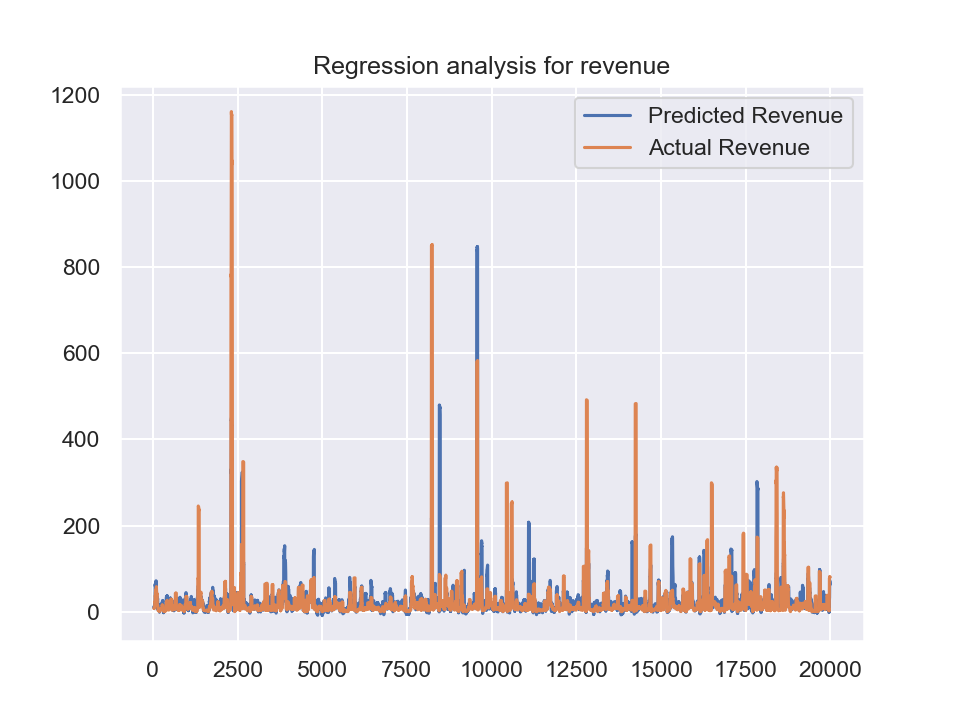

In [25]:
%matplotlib notebook
ypredict = train.predict(X)                      # Predict the dependent values using trained data
plt.plot(ypredict, label='Predicted Revenue')
plt.plot(y, label='Actual Revenue')
plt.title('Regression analysis for revenue')
plt.legend()
plt.show()